### Упражнения

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [4]:
import numpy as np

__Задача 1__

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

1. Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат.
2. Является ли значимым получившееся уравнение регрессии?

In [5]:
x = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]

In [6]:
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]

In [7]:
x = np.array(x)
y = np.array(y)

In [8]:
x

array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
       [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
       [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
       [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
       [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
       [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
       [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
       [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
       [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
       [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

In [9]:
import itertools

In [10]:
features_comb = list(itertools.combinations(range(np.shape(x)[1]), 2))

In [11]:
def features_compare(matrix:np.ndarray, y:np.ndarray, two_features:tuple):
    x = np.vstack((matrix[:,two_features[0]], matrix[:,two_features[1]])).T
    ones = np.ones((x.shape[0], 1))
    x = np.hstack((ones, x))
    XTX = x.T.dot(x)
    np.linalg.det(XTX)
    XTX_inv = np.linalg.inv(XTX)
    b = XTX_inv.dot(x.T).dot(y)
    z = x.dot(b)
    e = y - z
    R = 1 - e.var() / y.var()   
    print(f'Колонки с признаками:{two_features[0]},{two_features[1]}. Коэф.детерминации:{R}')
    return R

In [12]:
for i in features_comb:
    features_compare(x,y,i)

Колонки с признаками:0,1. Коэф.детерминации:0.18113594742585215
Колонки с признаками:0,2. Коэф.детерминации:0.7634246238793152
Колонки с признаками:0,3. Коэф.детерминации:0.4532966783144077
Колонки с признаками:1,2. Коэф.детерминации:0.5479482734039011
Колонки с признаками:1,3. Коэф.детерминации:0.6062055761129931
Колонки с признаками:2,3. Коэф.детерминации:0.622441987650532


Будем использовать F-статистику:
$$F = \dfrac{R^2 / m}{(1 - R^2) / (n - m - 1)},$$

$k_1 = m$, $k_2 = n - m - 1$.

In [13]:
R_square = 0.7634246238793152
k1 = 2
k2 = x.shape[0] - 2 - 1
F = (R_square / k1) / ((1-R_square) / k2)
F

11.29443912292265

In [14]:
from scipy import stats

In [15]:
alpha = 0.05
t = stats.f.ppf(1 - alpha, k1, k2)
t

4.73741412777588

Критическая область у нас правосторонняя, значение F-статистики попадает в критическую область, следовательно значение уравнения регрессии является статистически значимым.

__Задача 2__

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`?

In [44]:
a  = np.zeros(2509)
a[0:77] = 1
a.shape, np.unique(a, return_counts=True)

((2509,), (array([0., 1.]), array([2432,   77])))

In [46]:
b = np.zeros(1465)
b[0:60] = 1
b.shape, np.unique(b, return_counts=True)

((1465,), (array([0., 1.]), array([1405,   60])))

In [47]:
c = np.concatenate((a,b))
c.shape, np.unique(c, return_counts=True)

((3974,), (array([0., 1.]), array([3837,  137])))

In [49]:
# Найдем средние выборок
a_mean = a.mean()
b_mean = b.mean()
c_mean = c.mean()

print(a_mean, b_mean, c_mean)

0.03068951773614986 0.040955631399317405 0.03447408152994464


In [53]:
# Определим размеры выборок
n_a = a.shape[0]
n_b = b.shape[0]
n_c = c.shape[0]

print(n_a, n_b, n_c)

2509 1465 3974


In [54]:
# Вычислим отклонения между группами и внутри групп
SSb = n_a*(c_mean - a_mean)**2 + n_b*(c_mean - b_mean)**2
SSw = ((a - a_mean)**2).sum() + ((b - b_mean)**2).sum()
SSb, SSw

(0.09748158004016791, 132.17956925035745)

In [57]:
# Вычислим несмещённые оценки дисперсий
k = 2 # Количество выборок
n = n_c # Размер объединенных выборок

sigma2_b = SSb / (k - 1)
sigma2_k = SSw / (n - k)

print(sigma2_b, sigma2_k)

0.09748158004016791 0.03327783717279895


In [61]:
# Вычислим значение статистики
F = sigma2_b / sigma2_k
F

2.9293243889013496

In [84]:
# Статистика имеет распределение Фишера
# Найдем критическую область
alpha = 0.05 # Задаем уровень значимости

t = stats.f.ppf(1-alpha, k-1, n-k)
print(f'Правосторонняя критическая область: ({t}, +inf)')

Правосторонняя критическая область: (3.8438010503414866, +inf)


Значение статистики не попадает в критическую область, следовательно различия между средними по выборкам не являются значимыми.

__Квартет Энскомба__ — популярный в области анализа данных пример наборов данных, у которых практически совпадают все статистические свойства (средние, дисперсии, коэффициенты корреляции, регрессионные линии), однако, существенно отличаются графики. Данный пример призван показать, насколько важна визуализация данных. Датасет представляет собой 4 пары выборок:

```
{
    "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
    "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
    "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
    "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
    "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
    "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
}
```

По каждой паре выборок посчитайте:

1. выборочное среднее и дисперсию каждой выборки,
2. коэффициент корреляции Пирсона и прямую линейной регрессии.

Убедившись в том, что они не практически не отличаются, постройте `scatter plot` по каждой паре выборок.

In [63]:
dataset = {
            "x1": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
            "y1": [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68],
            "x2": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
            "y2": [9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74],
            "x3": [10.0, 8.0, 13.0, 9.0, 11.0, 14.0, 6.0, 4.0, 12.0, 7.0, 5.0],
            "y3": [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73],
            "x4": [8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 8.0, 19.0, 8.0, 8.0, 8.0],
            "y4": [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89]
          }

In [71]:
for i in range(1,5):
    x = dataset[f'x{i}']
    y = dataset[f'y{i}']
    
    print(f'x{i}, y{i}')
    print(f'Выборочное среднее: {np.mean(x)}, {np.mean(y)}')
    print(f'Дисперсия по выборке: {np.var(x)}, {np.var(y)}')
    print(f'Коэффициент корреляции Пирсона: {np.corrcoef(x,y)[0,1]} \n')
        

x1, y1
Выборочное среднее: 9.0, 7.500909090909093
Дисперсия по выборке: 10.0, 3.7520628099173554
Коэффициент корреляции Пирсона: 0.81642051634484 

x2, y2
Выборочное среднее: 9.0, 7.50090909090909
Дисперсия по выборке: 10.0, 3.752390082644628
Коэффициент корреляции Пирсона: 0.8162365060002427 

x3, y3
Выборочное среднее: 9.0, 7.5
Дисперсия по выборке: 10.0, 3.747836363636364
Коэффициент корреляции Пирсона: 0.8162867394895982 

x4, y4
Выборочное среднее: 9.0, 7.500909090909091
Дисперсия по выборке: 10.0, 3.7484082644628103
Коэффициент корреляции Пирсона: 0.8165214368885028 



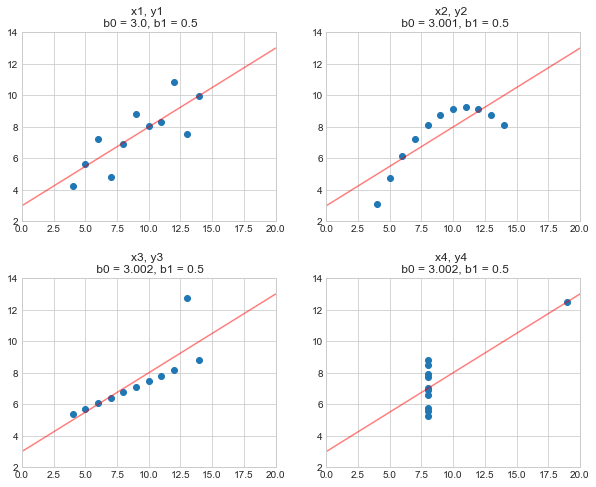

In [83]:
plt.style.use('seaborn-whitegrid')
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(10, 8)
fig.subplots_adjust(hspace = 0.3)
ox = np.linspace(0,20, num=10*4)

for i, ax in enumerate(axes.flatten()):
    i += 1
    x = dataset[f'x{i}']
    y = dataset[f'y{i}']
    
    b1 = np.cov(x, y, ddof=1)[0, 1] / np.var(x, ddof=1)
    b0 = np.mean(y) - b1 * np.mean(x)
    
    
    oy = b0 + b1 * ox

    ax.scatter(x, y)
    ax.plot(ox, oy, color='red', alpha=0.5)
    ax.set_xlim(0,20)
    ax.set_ylim(2,14)
    ax.set_title(f'x{i}, y{i} \n b0 = {round(b0,3)}, b1 = {round(b1,3)}')